**INITIALIZATION:**

In [16]:
#@ INITIALIZING NECESSARY PACKAGES AND DEPENDENCIES: 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

from keras.models import Sequential 
from keras.layers.core import Dense
from keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt
import numpy as np

**PERCEPTRON:**

In [2]:
#@ INITIALIZING PERCEPTRON MODEL: 
class Perceptron:                                       # Defining Perceptron. 
    def __init__(self, N, alpha=0.1):                   # Initializing Constructor Function. 
        self.W = np.random.randn(N + 1) / np.sqrt(N)    # Initializing Scaled Weight Matrix. 
        self.alpha = alpha                              # Initializing LR.
    
    def step(self, x):                                  # Defining Step Function. 
        return 1 if x > 0 else 0                        # Getting 1 if Positive else Negative. 
    
    def fit(self, X, y, epochs=10):                     # Defining Fit Function. 
        X = np.c_[X, np.ones((X.shape[0]))]             # Adding Column of Ones. 
        for epoch in np.arange(0, epochs):
            for (x, target) in zip(X, y):
                p = self.step(np.dot(x, self.W))        # Initializing Dot Product. 
                if p != target:
                    error = p - target                  # Computing Error. 
                    self.W += -self.alpha*error*x       # Updating Weight Matrix. 
    
    def predict(self, X, addBias=True):                 # Defining Predict Function. 
        X = np.atleast_2d(X)                            # Inspecting 2D Matrix. 
        if addBias:
            X = np.c_[X, np.ones((X.shape[0]))]         # Adding Bias Vector. 
        return self.step(np.dot(X, self.W))             # Initializing Dot Product. 

In [3]:
#@ EVALUATING PERCEPTRON BITWISE DATASETS: OR:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])          # Initializing Array Example. 
y = np.array([[0], [1], [1], [1]])                      # Initializing Array Example. 

#@ TRAINING PERCEPTRON MODEL: 
p = Perceptron(X.shape[1], alpha=0.1)                   # Initializing Perceptron Model. 
p.fit(X, y, epochs=20)                                  # Training Model. 

#@ MODEL EVALUATION: 
for (x, target) in zip(X, y):
    pred = p.predict(x)
    print(f"data={x}, ground-truth={target}, pred={pred}")

data=[0 0], ground-truth=[0], pred=0
data=[0 1], ground-truth=[1], pred=1
data=[1 0], ground-truth=[1], pred=1
data=[1 1], ground-truth=[1], pred=1


**NEURAL NETWORKS: BACKPROPAGATION**

In [4]:
#@ INITIALIZING BACKPROPAGATION ALGORITHM:
class NeuralNetwork:                                            # Defining Neural Network. 
    def __init__(self, layers, alpha=0.1):                      # Initializing Constructor Function. 
        self.W = []                                             # Initialization. 
        self.layers = layers                                    # Initialization. 
        self.alpha = alpha                                      # Initialization. 
        for i in np.arange(0, len(layers) - 2):
            w = np.random.randn(layers[i]+1, layers[i+1]+1)     # Initializing Weight Matrix. 
            self.W.append(w / np.sqrt(layers[i]))               # Normalizing Variance. 
        w = np.random.randn(layers[-2]+1, layers[-1])           # Initializing Weight Matrix. 
        self.W.append(w / np.sqrt(layers[-2]))                  # Normalizing Variance. 
    
    def __repr__(self):                                         # Function for Debugging. 
        return "NeuralNetwork: {}".format(
            "-".join(str(l) for l in self.layers))              # Inspecting. 
    
    def sigmoid(self, x):                                       # Defining Sigmoid Function. 
        return 1.0 / (1 + np.exp(-x))                           # Implementation of Sigmoid Function. 
    
    def sigmoid_deriv(self, x):                                 # Defining Function. 
        return x * (1 - x)                                      # Getting Derivative of Sigmoid. 
    
    def fit(self, X, y, epochs=1000, displayUpdate=100):        # Defining Fit Function. 
        X = np.c_[X, np.ones((X.shape[0]))]                     # Adding Column of Ones. 
        for epoch in np.arange(0, epochs):
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)                     # Backpropagation and Updating Matrix. 
            if epoch==0 or (epoch+1)%displayUpdate==0:
                loss = self.calculate_loss(X, y)                # Initializing Loss Calculation. 
                print("epoch={}, loss={:.7f}".format(
                    epoch+1, loss))                             # Inspecting Loss. 
    
    def fit_partial(self, x, y):                                # Defining Fit Partial Method. 
        A = [np.atleast_2d(x)]                                  # Initializing List. 

        #@ FEEDFORWARD:
        for layer in np.arange(0, len(self.W)):
            net = A[layer].dot(self.W[layer])                   # Dot Product of Activation and Weight Matrix. 
            out = self.sigmoid(net)                             # Implementing Nonlinear Activation Function. 
            A.append(out)                                       # Adding to Activations. 

        #@ BACKPROPAGATION:
        error = A[-1] - y                                       # Computing Error. 
        D = [error * self.sigmoid_deriv(A[-1])]                 # Initializing List of Deltas. 
        for layer in np.arange(len(A) - 2, 0, -1):
            delta = D[-1].dot(self.W[layer].T)                  # Initializing Dot Product. 
            delta = delta * self.sigmoid_deriv(A[layer])        # Implementating Derivative Function. 
            D.append(delta)                                     # Adding Activations. 
        D = D[::-1]                                             # Reversing Activations. 

        #@ WEIGHT UPDATE PHASE: 
        for layer in np.arange(0, len(self.W)):
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])
        
    def predict(self, X, addBias=True):                         # Defining Predict Function. 
        p = np.atleast_2d(X)                                    # Initialization. 
        if addBias:
            p = np.c_[p, np.ones((p.shape[0]))]                 # Adding Column of Ones. 
        for layer in np.arange(0, len(self.W)):
            p = self.sigmoid(np.dot(p, self.W[layer]))          # Implementing Dot Product. 
        return p
    
    def calculate_loss(self, X, targets):                       # Defining Function. 
        targets = np.atleast_2d(targets)                        # Initialization. 
        predictions = self.predict(X, addBias=False)            # Implementation of Predict Method. 
        loss = 0.5 * np.sum((predictions - targets)**2)         # Computing Loss. 
        return loss

In [5]:
#@ EVALUATING NEURAL NETWORKS ON BITWISE DATASETS: XOR:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])                  # Initializing Array Example. 
y = np.array([[0], [1], [1], [0]])                              # Initializing Array Example. 

#@ TRAINING NEURAL NETWORKS MODEL: 
nn = NeuralNetwork([2, 2, 1], alpha=0.5)                        # Initializing Neural Network.  
nn.fit(X, y, epochs=200)                                        # Training Model. 

#@ MODEL EVALUATION: 
for (x, target) in zip(X, y):
    pred = nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print(f"data={x}, ground-truth={target[0]}, pred={pred},"
          f"step={step}")

epoch=1, loss=0.5317512
epoch=100, loss=0.4957142
epoch=200, loss=0.4913100
data=[0 0], ground-truth=0, pred=0.4751030513080377,step=0
data=[0 1], ground-truth=1, pred=0.47896024764804435,step=0
data=[1 0], ground-truth=1, pred=0.5279040479362642,step=1
data=[1 1], ground-truth=0, pred=0.5123867348849976,step=1


**MNIST SAMPLE:**

In [6]:
#@ GETTING THE DATASET:
digits = datasets.load_digits()                         # Initializing Dataset. 
data = digits.data.astype("float")                      # Converting into Float. 
data = (data - data.min()) / (data.max() - data.min())  # Normalizing Dataset. 
print("samples: {}, dim: {}".format(data.shape[0],
                                  data.shape[1]))       # Inspecting Dataset. 

samples: 1797, dim: 64


In [7]:
#@ PREPARING THE DATASET:
(train_X, test_X, train_Y, test_Y) = train_test_split(
    data, digits.target, test_size=0.25)                    # Splitting Dataset. 
train_Y = LabelBinarizer().fit_transform(train_Y)           # Converting Labels to Vectors. 
test_Y = LabelBinarizer().fit_transform(test_Y)             # Converting Labels to Vectors. 

#@ TRAINING THE NEURAL NETWORK:
nn = NeuralNetwork([train_X.shape[1], 32, 16, 10])          # Initializing Neural Network. 
nn.fit(train_X, train_Y, epochs=1000)                       # Training Neural Network.
 
#@ EVALUATING THE NEURAL NETWORK: 
predictions = nn.predict(test_X)                            # Getting Predictions. 
predictions = predictions.argmax(axis=1)                    # Getting Maximum Probability. 
print(classification_report(
    test_Y.argmax(axis=1), predictions))                    # Inspecting Classification Report. 

epoch=1, loss=603.6436047
epoch=100, loss=6.7991431
epoch=200, loss=2.3439244
epoch=300, loss=1.5595649
epoch=400, loss=1.3600940
epoch=500, loss=1.2639233
epoch=600, loss=1.2070289
epoch=700, loss=1.1679645
epoch=800, loss=0.6600999
epoch=900, loss=0.6320372
epoch=1000, loss=0.6139866
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       0.95      0.91      0.93        57
           2       0.96      0.98      0.97        48
           3       1.00      0.95      0.98        42
           4       1.00      1.00      1.00        41
           5       0.96      0.96      0.96        53
           6       1.00      0.97      0.99        37
           7       0.98      0.98      0.98        44
           8       0.86      0.93      0.89        41
           9       0.98      0.95      0.96        43

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted 

**NEURAL NETWORKS:**

In [10]:
#@ GETTING THE DATASET: 
dataset = datasets.fetch_openml("mnist_784")                # Downloading Dataset. 
data = dataset.data.astype("float") / 255.0                 # Initializing Data Normalization. 

#@ PREPARING THE DATASET:
lb = LabelBinarizer()                                       # Initializing LabelBinarizer. 
(train_X, test_X, train_Y, test_Y) = train_test_split(
    data, dataset.target, test_size=0.25)                   # Splitting Dataset. 
train_Y = LabelBinarizer().fit_transform(train_Y)           # Converting Labels to Vectors. 
test_Y = LabelBinarizer().fit_transform(test_Y)             # Converting Labels to Vectors. 

In [9]:
#@ DEFINING NETWORK ARCHITECTURE: 
model = Sequential()                                            # Initializing Sequential Model. 
model.add(Dense(256, input_shape=(784,), activation="sigmoid")) # Initializing Dense Layer. 
model.add(Dense(128, activation="sigmoid"))                     # Adding Dense Layer. 
model.add(Dense(10, activation="softmax"))                      # Adding Dense Output Layer. 

#@ TRAINING NEURAL NETWORK:
sgd = SGD(0.01)                                                 # Initializing SGD Optimizer. 
model.compile(loss="categorical_crossentropy", optimizer=sgd, 
              metrics=["accuracy"])                             # Compiling Model. 
H = model.fit(train_X, train_Y,validation_data=(test_X,test_Y), 
              epochs=100, batch_size=128)                       # Training Model. 

Epoch 1/100
411/411 [==============================] - 6s 12ms/step - loss: 2.2737 - accuracy: 0.2045 - val_loss: 2.2423 - val_accuracy: 0.3751
Epoch 2/100
411/411 [==============================] - 5s 11ms/step - loss: 2.2136 - accuracy: 0.3976 - val_loss: 2.1813 - val_accuracy: 0.4214
Epoch 3/100
411/411 [==============================] - 5s 11ms/step - loss: 2.1438 - accuracy: 0.5190 - val_loss: 2.1013 - val_accuracy: 0.5834
Epoch 4/100
411/411 [==============================] - 5s 11ms/step - loss: 2.0489 - accuracy: 0.5854 - val_loss: 1.9892 - val_accuracy: 0.6376
Epoch 5/100
411/411 [==============================] - 5s 11ms/step - loss: 1.9176 - accuracy: 0.6274 - val_loss: 1.8358 - val_accuracy: 0.6569
Epoch 6/100
411/411 [==============================] - 5s 12ms/step - loss: 1.7459 - accuracy: 0.6600 - val_loss: 1.6478 - val_accuracy: 0.6816
Epoch 7/100
411/411 [==============================] - 5s 12ms/step - loss: 1.5493 - accuracy: 0.6950 - val_loss: 1.4484 - val_accuracy:

In [12]:
#@ MODEL EVALUATION: 
predictions = model.predict(test_X, batch_size=128)             # Getting Predictions. 
print(classification_report(test_Y.argmax(axis=1), 
                            predictions.argmax(axis=1)))        # Inspecting Classification Report. 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1728
           1       0.94      0.97      0.96      1938
           2       0.91      0.90      0.91      1743
           3       0.92      0.89      0.90      1798
           4       0.91      0.93      0.92      1639
           5       0.89      0.88      0.88      1608
           6       0.94      0.96      0.95      1732
           7       0.94      0.94      0.94      1849
           8       0.90      0.87      0.89      1684
           9       0.90      0.89      0.90      1781

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



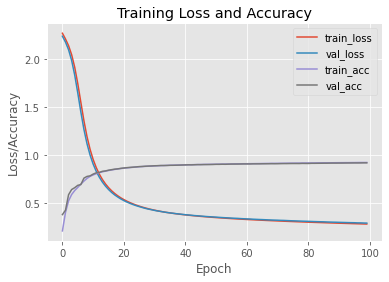

In [15]:
#@ INSPECTING TRAINING LOSS AND ACCURACY:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show();

**NEURAL NETWORKS: CIFAR10**

In [18]:
#@ PREPARING THE DATASET:
((trainX, trainY), (testX, testY)) = cifar10.load_data()            # Loading Dataset. 
trainX = trainX.astype("float") / 255.0                             # Normalizing Dataset. 
testX = testX.astype("float") / 255.0                               # Normalizing Dataset. 
trainX = trainX.reshape((trainX.shape[0], 3072))                    # Reshaping Dataset.
testX = testX.reshape((testX.shape[0], 3072))                       # Reshaping Dataset. 

#@ PREPARING THE DATASET:
lb = LabelBinarizer()                                               # Initializing LabelBinarizer. 
trainY = lb.fit_transform(trainY)                                   # Converting Labels to Vectors. 
testY = lb.transform(testY)                                         # Converting Labels to Vectors. 
labelNames = ["airplane", "automobile", "bird", "cat", "deer", 
              "dog", "frog", "horse", "ship", "truck"]              # Initializing LabelNames. 

In [20]:
#@ DEFINING NETWORK ARCHITECTURE: 
model = Sequential()                                                # Initializing Sequential Model. 
model.add(Dense(1024, input_shape=(3072, ), activation="relu"))     # Adding Dense Layer.
model.add(Dense(512, activation="relu"))                            # Adding Dense Layer. 
model.add(Dense(10, activation="softmax"))                          # Adding Softmax Layer. 

#@ TRAINING NEURAL NETWORK:
sgd = SGD(0.01)                                                     # Initializing SGD Optimizer. 
model.compile(loss="categorical_crossentropy", optimizer=sgd, 
              metrics=["accuracy"])                                 # Compiling Model. 
H = model.fit(trainX, trainY,validation_data=(testX,testY), 
              epochs=100, batch_size=32)                            # Training Model. 

Epoch 1/100
1563/1563 [==============================] - 39s 25ms/step - loss: 1.8406 - accuracy: 0.3420 - val_loss: 1.7348 - val_accuracy: 0.3825
Epoch 2/100
1563/1563 [==============================] - 38s 25ms/step - loss: 1.6510 - accuracy: 0.4156 - val_loss: 1.6031 - val_accuracy: 0.4362
Epoch 3/100
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5671 - accuracy: 0.4468 - val_loss: 1.5518 - val_accuracy: 0.4554
Epoch 4/100
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5076 - accuracy: 0.4694 - val_loss: 1.4932 - val_accuracy: 0.4649
Epoch 5/100
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4636 - accuracy: 0.4840 - val_loss: 1.5371 - val_accuracy: 0.4583
Epoch 6/100
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4193 - accuracy: 0.5019 - val_loss: 1.5123 - val_accuracy: 0.4642
Epoch 7/100
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3844 - accuracy: 0.5103 - val_loss: 1

In [21]:
#@ MODEL EVALUATION: 
predictions = model.predict(testX, batch_size=32)           # Getting Predictions. 
print(classification_report(testY.argmax(axis=1), 
                            predictions.argmax(axis=1),
                            target_names=labelNames))       # Inspecting Classification Report. 

              precision    recall  f1-score   support

    airplane       0.61      0.68      0.64      1000
  automobile       0.72      0.63      0.67      1000
        bird       0.46      0.51      0.48      1000
         cat       0.40      0.39      0.39      1000
        deer       0.55      0.42      0.48      1000
         dog       0.47      0.47      0.47      1000
        frog       0.62      0.63      0.63      1000
       horse       0.64      0.62      0.63      1000
        ship       0.65      0.73      0.69      1000
       truck       0.60      0.62      0.61      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



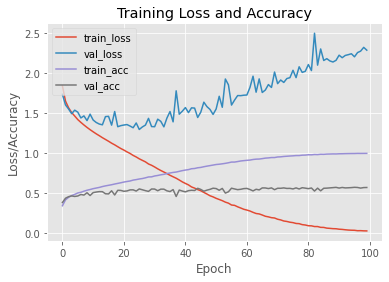

In [22]:
#@ INSPECTING TRAINING LOSS AND ACCURACY:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show();